In [12]:
import pandas as pd
import seaborn as sns

data_train = pd.read_csv(filepath_or_buffer="../data/processed/train_to_visu.csv")

In [13]:
sns.set_theme(style="darkgrid")

In [14]:
data_train

,IdPasajero,Condicion,Clase,Genero,Edad,#Hermanos o conyuges a bordo,#Padres o hijos a bordo,Ticket,Tarifa,Cabina,Puerto de embarcacion
0,1,Fallecido,Tercera,Hombre,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,Sobreviviente,Primera,Mujer,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,Sobreviviente,Tercera,Mujer,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,Sobreviviente,Primera,Mujer,35.0,1,0,113803,53.1000,C123,Southampton
4,5,Fallecido,Tercera,Hombre,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...
886,887,Fallecido,Segunda,Hombre,27.0,0,0,211536,13.0000,NaN,Southampton
887,888,Sobreviviente,Primera,Mujer,19.0,0,0,112053,30.0000,B42,Southampton
888,889,Fallecido,Tercera,Mujer,NaN,1,2,W./C. 6607,23.4500,NaN,Southampton
889,890,Sobreviviente,Primera,Hombre,26.0,0,0,111369,30.0000,C148,Cherbourg


## Relación entre cada atributo y el objetivo


### Cantidad de sobrevivientes por clase


In [15]:
data_survivors_by_class = (
    data_train.copy()
    .loc[:, ["Condicion", "Clase"]]
    .groupby(by=["Clase", "Condicion"])
    .size()
    .reset_index()
    .rename(columns={0: "Cantidad"})
)


data_survivors_by_class

,Clase,Condicion,Cantidad
0,Primera,Fallecido,80
1,Primera,Sobreviviente,136
2,Segunda,Fallecido,97
3,Segunda,Sobreviviente,87
4,Tercera,Fallecido,372
5,Tercera,Sobreviviente,119


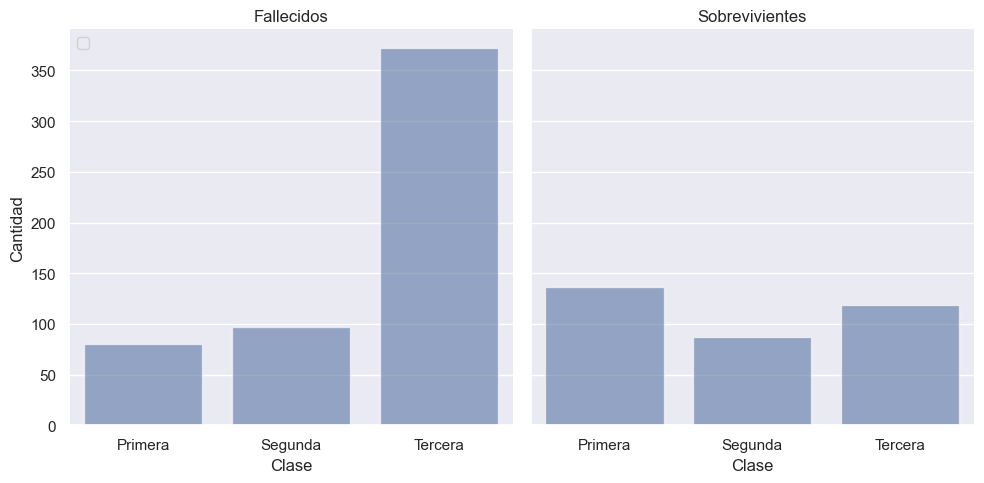

In [28]:
graph_survivors_by_class = sns.catplot(
    data=data_survivors_by_class,
    x="Clase",
    y="Cantidad",
    col="Condicion",
    kind="bar",
    alpha=0.6,
).set_titles(template="{col_name}s")

### Cantidad de fallecidos por género


In [17]:
data_survivors_by_sex = (
    data_train.copy()
    .loc[:, ["Genero", "Condicion"]]
    .groupby(by=["Genero", "Condicion"])
    .size()
    .reset_index()
    .rename(columns={0: "Cantidad"})
)
data_survivors_by_sex

,Genero,Condicion,Cantidad
0,Hombre,Fallecido,468
1,Hombre,Sobreviviente,109
2,Mujer,Fallecido,81
3,Mujer,Sobreviviente,233


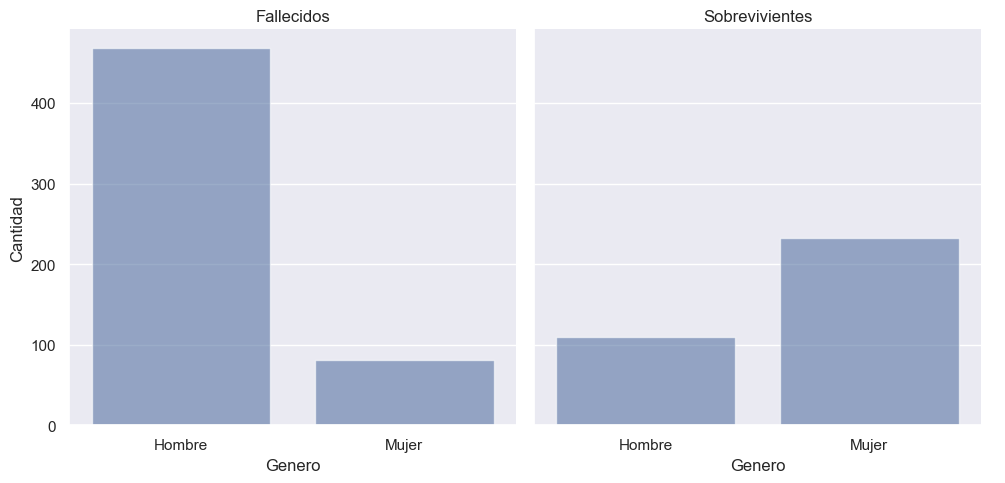

In [29]:
graph_survivors_by_gender = sns.catplot(
    data=data_survivors_by_sex,
    x="Genero",
    y="Cantidad",
    col="Condicion",
    kind="bar",
    alpha=0.6,
).set_titles(template="{col_name}s")

### Cantidad de sobrevivientes por edad


clasificamos a cada pasajero por su edad


In [19]:
data_survivors_by_age = (
    data_train.copy().loc[:, ["Edad", "Condicion"]].loc[data_train["Edad"].notna()]
)

data_survivors_by_age

,Edad,Condicion
0,22.0,Fallecido
1,38.0,Sobreviviente
2,26.0,Sobreviviente
3,35.0,Sobreviviente
4,35.0,Fallecido
...,...,...
885,39.0,Fallecido
886,27.0,Fallecido
887,19.0,Sobreviviente
889,26.0,Sobreviviente


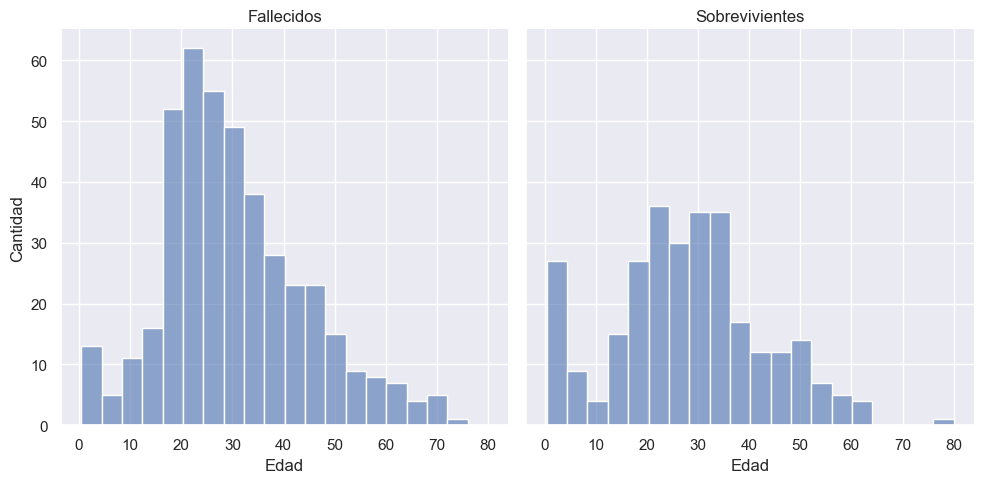

In [20]:
graph_survivors_by_age = (
    sns.displot(
        data=data_survivors_by_age, kind="hist", col="Condicion", x="Edad", alpha=0.6
    )
    .set_axis_labels(y_var="Cantidad")
    .set_titles(template="{col_name}s")
)

In [21]:
def rango_etario(edad: float) -> str:
    def rango(min: float, max: float) -> bool:
        return edad >= min and edad < max

    if rango(min=0, max=6):
        return "Primera infancia"
    elif rango(min=6, max=12):
        return "Infancia"
    elif rango(min=12, max=18):
        return "Adolecencia"
    elif rango(min=18, max=26):
        return "Juventud"
    elif rango(min=26, max=59):
        return "Adultez"
    else:
        return "Persona adulta"


def apply_rango_etario(pasajero: pd.Series) -> pd.Series:
    return pd.Series(
        (
            {
                "Condicion": pasajero["Condicion"],
                "Rango etario": rango_etario(pasajero["Edad"]),
            }
        )
    )


data_survivors_by_age_range = (
    data_survivors_by_age.copy()
    .apply(
        apply_rango_etario,
        axis=1,
    )
    .groupby(by=["Rango etario", "Condicion"])
    .size()
    .reset_index()
    .rename(columns={0: "Cantidad"})
)

data_survivors_by_age_range

,Rango etario,Condicion,Cantidad
0,Adolecencia,Fallecido,23
1,Adolecencia,Sobreviviente,22
2,Adultez,Fallecido,226
3,Adultez,Sobreviviente,159
4,Infancia,Fallecido,16
5,Infancia,Sobreviviente,8
6,Juventud,Fallecido,125
7,Juventud,Sobreviviente,63
8,Persona adulta,Fallecido,21
9,Persona adulta,Sobreviviente,7


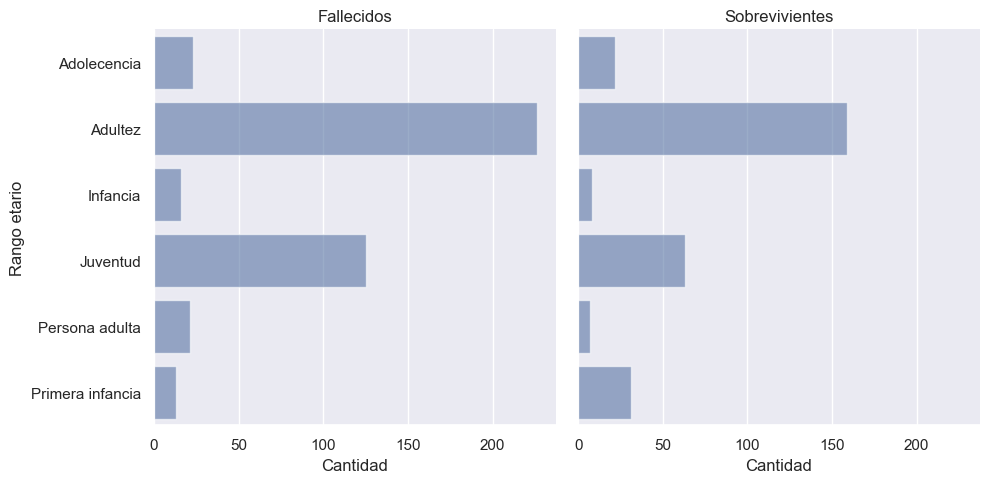

In [25]:
graph_survivors_by_age_range = sns.catplot(
    data=data_survivors_by_age_range,
    kind="bar",
    y="Rango etario",
    col="Condicion",
    x="Cantidad",
    orient="h",
    alpha=0.6,
).set_titles(template="{col_name}s")